# Regional distribution of precipitation

In [2]:
import sys
import os
aps_path = os.path.dirname(os.path.abspath("."))
sys.path.append(aps_path)
print(aps_path)

D:\Dev\APS\aps


In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from aps_io.get_arome import nc_load

In [4]:
%matplotlib inline

Read precipitation data from netcdf file and clip to a subregion.

In [5]:
nc = Dataset("../data/met_obs_grid/rr_2016_12_12.nc", "r")

time_var = nc.variables['time']
#altitude_var = nc.variables['altitude']
precip_var = nc.variables['precipitation_amount']

In [6]:
x1, x2 = 500, 700
y1, y2 = 200, 600

precip = precip_var[0, y1:y2, x1:x2]

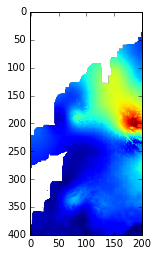

In [7]:
plt.imshow(precip, aspect='equal')
plt.show()

In [10]:
pf = precip.flatten()
print(pf)
precip = np.clip(pf, 0, 1000)

box_bot = np.nanpercentile(precip, 25.0)
box_top = np.nanpercentile(precip, 75.0)
box_center = np.nanpercentile(precip, 50.0)
flier_low = np.min(precip) #np.nanpercentile(precip, 5.0)
flier_high = np.max(precip) #np.nanpercentile(precip, 95.0)
pf_mean = np.nanmean(precip)
#box_data = np.concatenate((spread, center, flier_high, flier_low), 0)


print(flier_low, box_bot, box_center, box_top, flier_high, pf_mean)

[-- -- -- ..., 0.0 0.0 0.0]
0.0 0.0 4.19999980927 10.1999998093 44.5 10.9679
